In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

# P1

Se realiza un ajuste gaussiano típico para cada set de datos, donde se considera solo el mes de Julio y los años 3 años más recientes para buscar tener una muestra más representativa e interpretable. Se define primero las funciones necesarias para posteriormente aplicar esta a cada estación. 
Además, se crea una lista de histogramas "hists" que irá agregando los histogramas generados en base a cada dataset cada vez que se ejecute la función para así poder responder la parte 2 de esta pregunta. Por ello se espera que cada celda se ejecute UNA sola vez y en orden.

In [54]:
hists = []

def gauss(x, mu, sigma, A):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

def mce(f, hist,mu_fit,sigma_fit, A_fit):
    res = 0
    for i in range(len(hist)):
        res += (hist[i] - f(i,mu_fit,sigma_fit, A_fit))**2
    res = res / len(hist)
    return res

def f(x,mu_fit,sigma_fit, A_fit):
        return gauss(x,mu_fit,sigma_fit, A_fit)

def fit(file_path, station, z = 100, q = False):
    global hists
    
    # leer el archivo y filtrar los datos
    data = pd.read_csv(file_path)
    data = data[data["year"] <= 2023]
    data = data[data["year"] >= 2021]
    data = data[data["month"] == 7]
    
    # extraer la columna deseada
    x = data["HR"].dropna().values
    x = x[x <= z]
    
    # histograma
    hist, bin_edges = np.histogram(x, bins=100, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    hists.append(hist)

    # ajustar gaussiana
    params, _ = curve_fit(gauss, bin_centers, hist, p0=[np.mean(x), np.std(x), 1])
    mu_fit, sigma_fit, A_fit = params

    gaussian_fit = gauss(bin_centers, mu_fit, sigma_fit, A_fit)
    
    ecm = mce(f, hist,mu_fit,sigma_fit, A_fit)
    
    plt.figure(figsize=(10, 6))
    plt.hist(x, bins=100, density=True, color='lightgreen', edgecolor='black', alpha=0.7, label="Data")
    plt.plot(bin_centers, gaussian_fit, 'r-', label=f"Gaussian Fit: $\mu={mu_fit:.2f}$, $\sigma={sigma_fit:.2f}$, $\epsilon={ecm}$")
    plt.xlabel("HR")
    plt.ylabel('Density')
    plt.title(f'{station} - July')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

Se aplica el fiteo gaussiano a cada una de las estaciones por separado y se muestran los parámetros resultantes.

c:\Users\rirc1\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


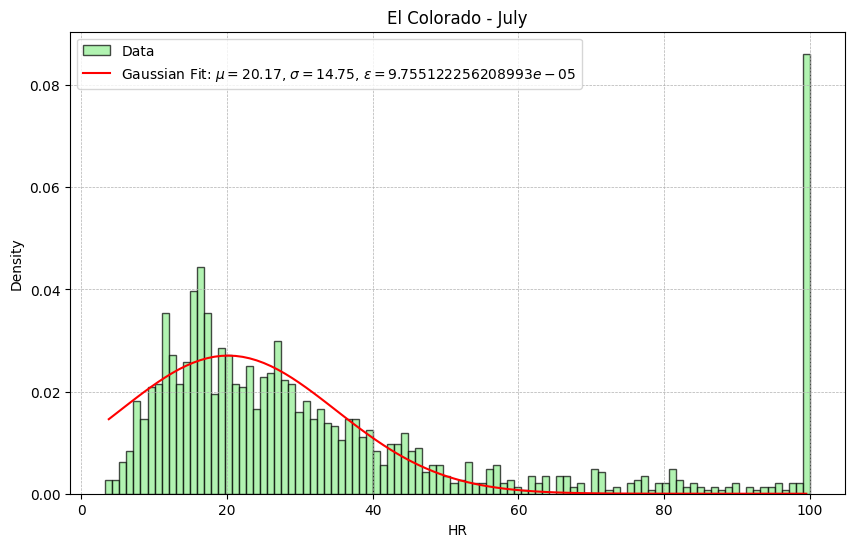

c:\Users\rirc1\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


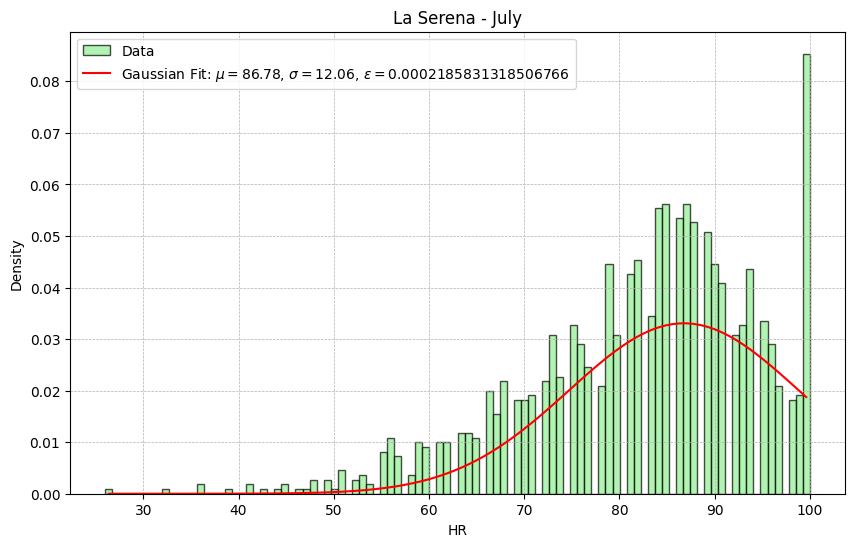

c:\Users\rirc1\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


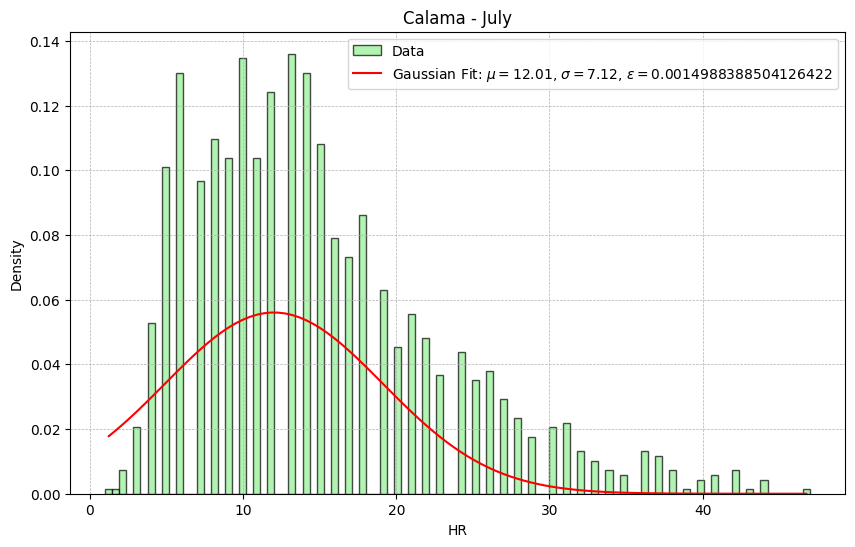

c:\Users\rirc1\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


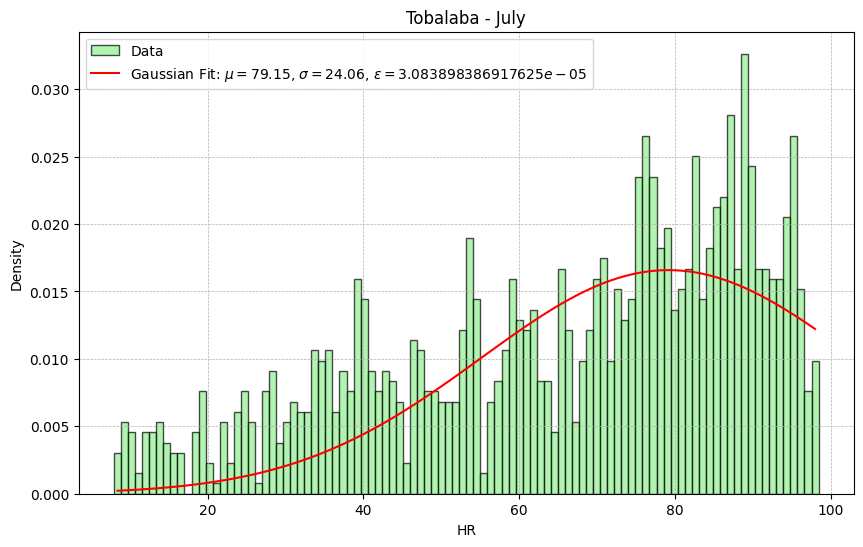

In [55]:
fit("data/330077_HR.csv", "El Colorado")
fit("data/290004_HR.csv", "La Serena")
fit("data/220002_HR.csv", "Calama")

# sacamos los valores iguales a 100 pues corresponden a outliers
fit("data/330019_HR.csv", "Tobalaba", 99)

c:\Users\rirc1\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


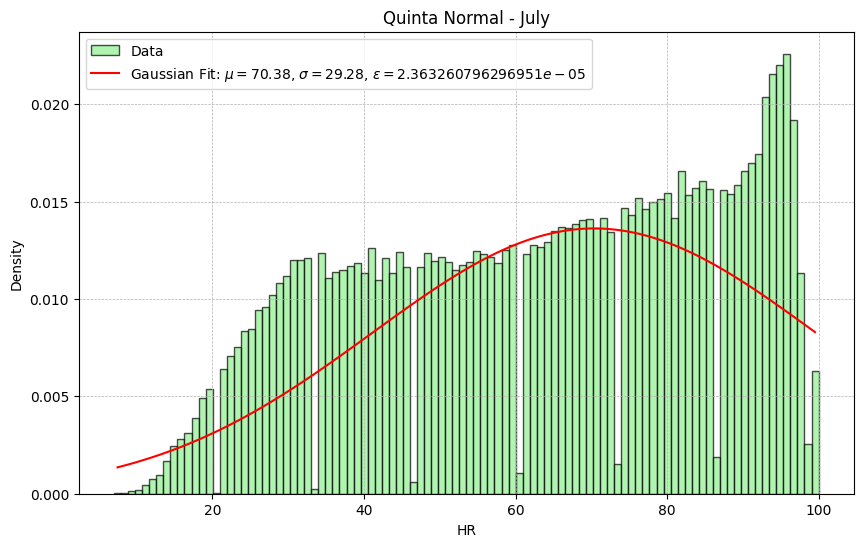

Errores cuadraticos medios c/r a las otras estaciones
El Colorado: 0.00025617299002904305
La Serena: 0.0002899758784893551
Calama: 0.0017934151733548954
Tobalaba: 3.4683820897615806e-05


In [56]:
# analogo a las funciones anteriores, pero sin filtrar los datos
data = pd.read_csv("data/quintanormal.csv")

x = data["HR"].dropna().values
    
hist, bin_edges = np.histogram(x, bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

params, _ = curve_fit(gauss, bin_centers, hist, p0=[np.mean(x), np.std(x), 1])
mu_fit, sigma_fit, A_fit = params

gaussian_fit = gauss(bin_centers, mu_fit, sigma_fit, A_fit)
    
# calculamos el error cuadratico medio del fit gaussiano de quinta normal con respecto a su histograma de datos
# y también con respecto a los datos de las estaciones anteriores para compararlas
ecm = mce(f, hist,mu_fit,sigma_fit, A_fit)
ecm1 = mce(f, hists[0],mu_fit,sigma_fit, A_fit)
ecm2 = mce(f, hists[1],mu_fit,sigma_fit, A_fit)
ecm3 = mce(f, hists[2],mu_fit,sigma_fit, A_fit)
ecm4 = mce(f, hists[3],mu_fit,sigma_fit, A_fit)
    
plt.figure(figsize=(10, 6))
plt.hist(x, bins=100, density=True, color='lightgreen', edgecolor='black', alpha=0.7, label="Data")
plt.plot(bin_centers, gaussian_fit, 'r-', label=f"Gaussian Fit: $\mu={mu_fit:.2f}$, $\sigma={sigma_fit:.2f}$, $\epsilon={ecm}$")
plt.xlabel("HR")
plt.ylabel('Density')
plt.title(f'Quinta Normal - July')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

print("Errores cuadraticos medios c/r a las otras estaciones") 
print(f"El Colorado: {ecm1}")
print(f"La Serena: {ecm2}")
print(f"Calama: {ecm3}")
print(f"Tobalaba: {ecm4}")

Notamos que visualmente el ajuste gaussiano de Quinta Normal es más parecido a la distribución de Toabalaba que al resto de estaciones, además sus parámetros $\mu$ y $\sigma$ son bastante parecidos a los de esta misma estación. Por último, se realizó un cálculo del error cuadrático medio entre el ajuste gaussiano de la estación Quinta Normal con respecto a los histogramas (datos) de todo el resto de estaciones, lo cual se retornó al hacer el ajuste de esta estación, y se verifica que los datos a los que más se aproxima el ajuste de Quinta Normal es a los de Tobalaba pues tiene un mucho menor error cuadrático medio que el resto.

# P2

Consideramos dos datasets; uno llamado "chillan" que contiene los registros de lluvias de la estación Termas de Chillán en 2023 y otro "chillanv" que contiene los datos de las lluvias en los meses de mayo, junio y julio entre los años 2017 y 2021 para tener una muestra representativa de lo que es una lluvia normal para la estación meteorológica en esa época.

In [60]:
chillan_2023 = pd.read_csv('data/chillan.csv')
chillan_past_years = pd.read_csv('data/chillanv.csv')

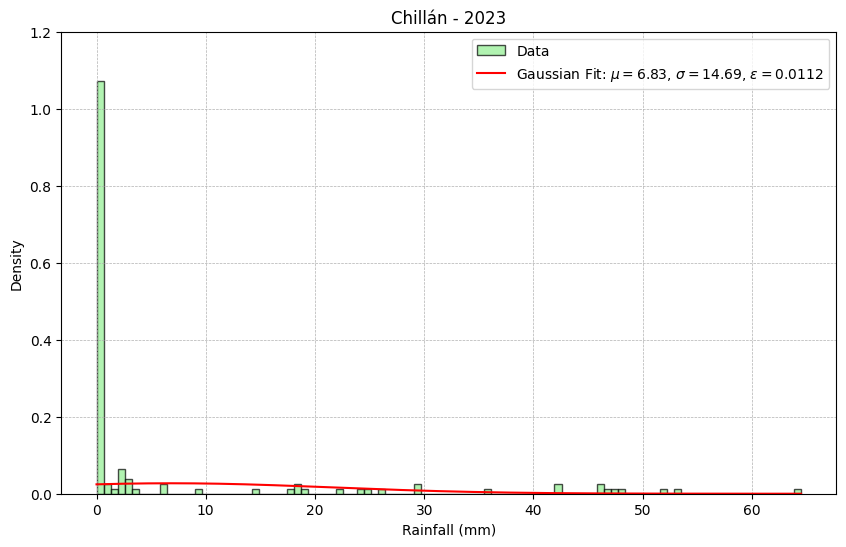

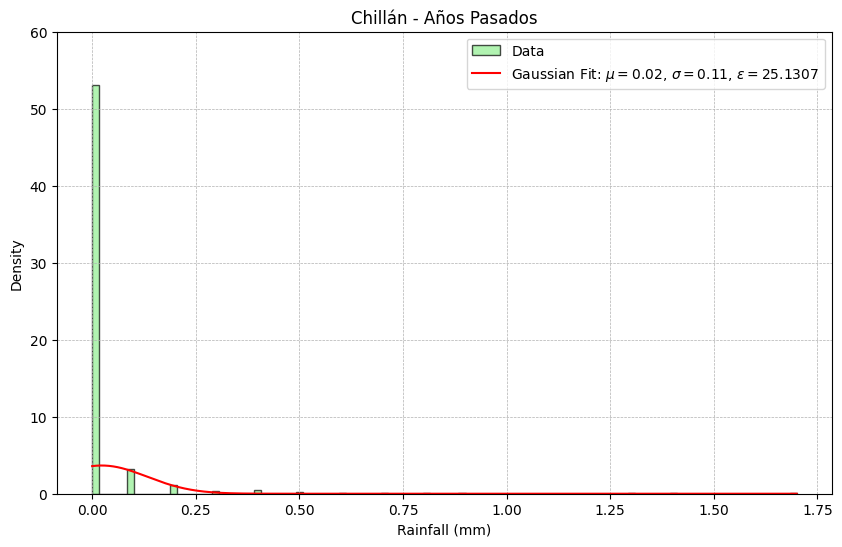

In [77]:
import scipy.stats as stats

# definimos un nuevo fit gaussiano más sencillo para esta pregunta
# aparentemente curve fit no se comporta muy bien

def newfit(data, title, y_limit=None):
    mu_fit, sigma_fit = np.mean(data), np.std(data)
    x = np.linspace(min(data), max(data), 1000)
    gaussian_fit = stats.norm.pdf(x, mu_fit, sigma_fit)
    
    hist, bin_edges = np.histogram(data, bins=100, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    gaussian_values = stats.norm.pdf(bin_centers, mu_fit, sigma_fit)
    ecm = np.mean((gaussian_values - hist)**2)
    
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=100, density=True, color='lightgreen', edgecolor='black', alpha=0.7, label="Data")
    plt.plot(x, gaussian_fit, 'r-', label=f"Gaussian Fit: $\mu={mu_fit:.2f}$, $\sigma={sigma_fit:.2f}$, $\epsilon={ecm:.4f}$")
    plt.xlabel("Rainfall (mm)")
    plt.ylabel('Density')
    plt.title(title)
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    if y_limit:
        plt.ylim(y_limit)
    plt.show()

newfit(chillan_2023['RRR6 (mm)'], 'Chillán - 2023', y_limit=(0, 1.2))
newfit(chillan_past_years['RRR6 (mm)'], 'Chillán - Años Pasados', y_limit=(0, 60))

Es clara una diferencia tanto visual como en los parámetros $\mu$ y $\sigma$ de las distribuciones, además, tomando como referencia la varianza de los años anteriores podemos calcular la distancia que tiene la media de 2023 con respecto a la media de años anteriores

In [82]:
mu23, sigma23 = np.mean(chillan_2023['RRR6 (mm)']), np.std(chillan_2023['RRR6 (mm)'])
mu, sigma = np.mean(chillan_past_years['RRR6 (mm)']), np.std(chillan_past_years['RRR6 (mm)'])

z = (mu23 - mu) / sigma
z

62.54581053327232

Es decir, la media de lluvia para el mes de junio de 2023 está corrida aproximadamente 63 veces de la de años anteriores, valor que sería incluso mayor si considerásemos solo los valores para los días 22 a 26 de Junio

In [91]:
data = pd.read_csv("data/chillan.csv", parse_dates=True)
data['Fecha'] = pd.to_datetime(data['Fecha'], dayfirst=True)

# filtrar los datos que estén fuera de las fechas 22, 23, 24, 25 y 26 de junio
filtered_data = data[data['Fecha'].isin(pd.date_range(start="2023-06-22", end="2023-06-26"))]

filtered_data

mu_, sigma_ = np.mean(filtered_data['RRR6 (mm)']), np.std(filtered_data['RRR6 (mm)'])

z = (mu_ - mu) / sigma
z



270.3431166848787

Tenemos entonces que la media de lluvia durante el temporal del 22 al 26 de Julio de 2023 está corrida 270 desviaciones estándar con respecto a la media histórica de los últimos años para los meses de Mayo a Julio, por lo que podemos concluir que esta lluvia es a lo menos atípica e improbable, por no decir rara.